IMPORT NECESSARY LIBRARIES

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
import matplotlib.pyplot as plt


LOAD DATA

In [3]:
df = pd.read_csv('./datasets/datasets.csv')

PREPROCESS DATA

In [4]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.rename(columns={'6':'Pregnancies','148':'Glucose','72':'BloodPressure','35':'SkinThickness','0':'Insulin','33.6':'BMI','0.627':'DiabetesPedigreeFunction','50':'Age','1':'Outcome'
},inplace=True)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.isna().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      767
Name: count, dtype: int64

In [2]:
df.describe()

NameError: name 'df' is not defined

In [5791]:
df['Outcome'].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

VISUALIZE DATA

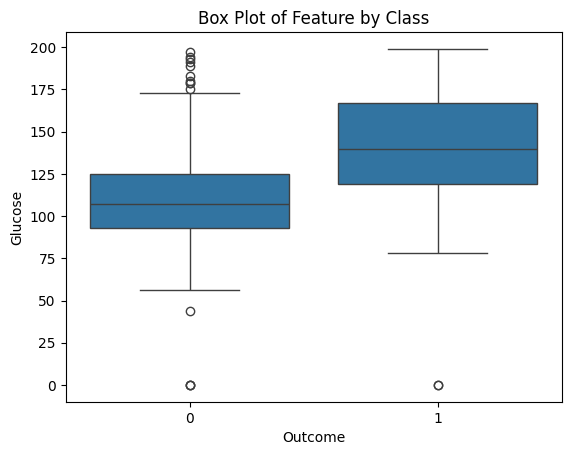

In [5792]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe 'df' should be defined before this point

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your seaborn code
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot of Feature by Class')
plt.show()

# We can see that high glucose means higher chances of diabetes

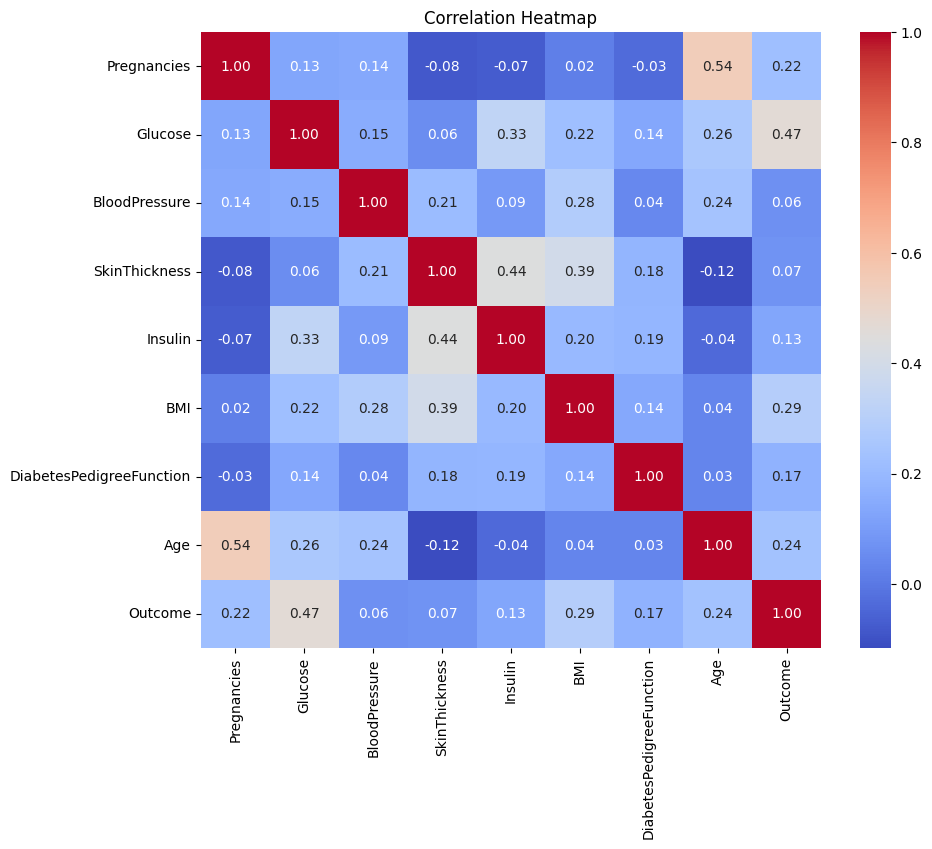

In [5793]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


FEATURE SELECTION

In [5794]:
X = df.drop('Outcome', axis='columns')  # 'Outcome' is the target variable
y = df['Outcome']

In [5795]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [5796]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

SPLIT THE DATA INTO TRAINING PART AND TESTING PART

In [5797]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

In [5798]:
X_train.shape

(613, 8)

In [5799]:
X_test.shape

(154, 8)

In [5800]:
y_train.value_counts()

Outcome
0    400
1    213
Name: count, dtype: int64

In [5801]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

SCALE THE DATA

In [5802]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DEFINE CLASSIFIERS

In [5803]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [5804]:
classifiers = {
    "Logistic Regression": LogisticRegression(C=1.1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(C=0.2),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "ANN": model,
}

TRAIN CLASSIFIER

In [5805]:
def predict(name, classifier, X_test):
    if name == "ANN":
        y_pred = classifier.predict(X_test)
        y_pred = np.array(y_pred).flatten()
        for i in range(y_pred.size):
            if y_pred[i] >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
    else:
        y_pred = classifier.predict(X_test)
    return y_pred
    

In [5806]:
results = {}
best_classifiers = {}
y_pred_ensemble = np.zeros((y_test.shape[0],))

for name, classifier in classifiers.items():
    if name == "ANN":
        classifier.fit(X_train, y_train, epochs=50, validation_split=0.2)
    else:
        classifier.fit(X_train, y_train)
    
    y_pred = predict(name, classifier, X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    if accuracy >= 0.8:
        y_pred_ensemble = np.add(y_pred_ensemble,np.array(y_pred))
        best_classifiers[name] = classifier
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep
    }


Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 0.6772 - accuracy: 0.6469 - val_loss: 0.6582 - val_accuracy: 0.6748
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6469 - val_loss: 0.6461 - val_accuracy: 0.6748
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6469 - val_loss: 0.6359 - val_accuracy: 0.6748
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6469 - val_loss: 0.6286 - val_accuracy: 0.6748
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.6469 - val_loss: 0.6178 - val_accuracy: 0.6748
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6469 - val_loss: 0.6073 - val_accuracy: 0.6748
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6490 - val_loss: 0.5976 - val_accuracy: 0.6829
Epoch 8/50
16/16 [==

PRINT RESULTS

In [5807]:
# Print results for each classifier
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("=" * 40)

# Find the best-performing model
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"The best-performing model is: {best_model} with accuracy {results[best_model]['Accuracy']:.4f}")


Classifier: Logistic Regression
Accuracy: 0.8442
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       100
           1       0.89      0.63      0.74        54

    accuracy                           0.84       154
   macro avg       0.86      0.79      0.81       154
weighted avg       0.85      0.84      0.84       154

Classifier: Decision Tree
Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Classifier: Random Forest
Accuracy: 0.8247
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.67

VISUALIZE RESULTS

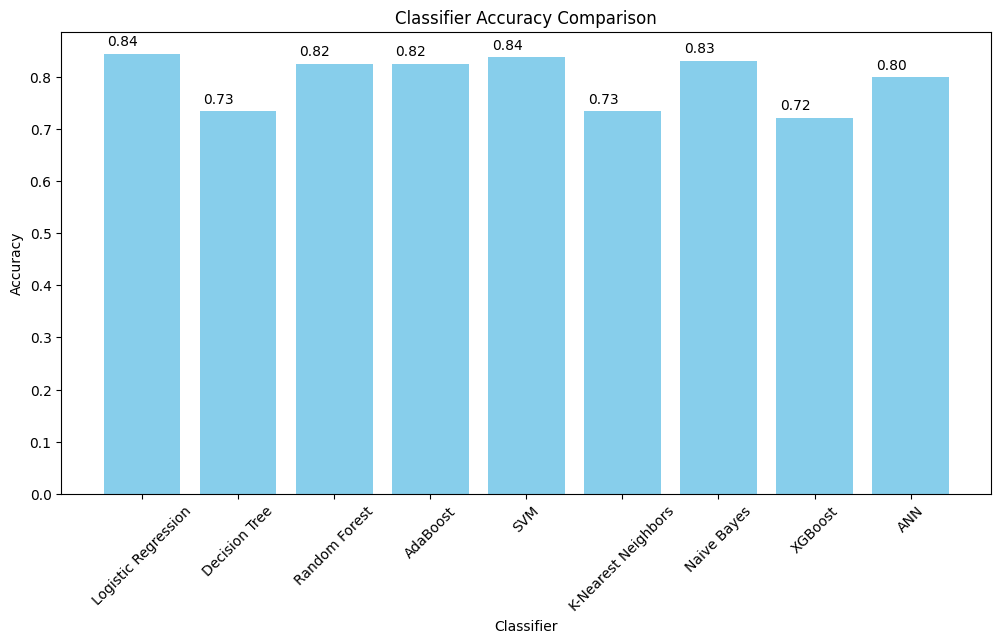

In [5808]:
accuracy_scores = [results[classifier]["Accuracy"] for classifier in classifiers.keys()]
classifier_names = classifiers.keys()

plt.figure(figsize=(12, 6))
bars = plt.bar(classifier_names, accuracy_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)

# Add labels to the bars
for bar, label in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, f'{label:.2f}', ha='center', va='bottom')

plt.show()

SVM does not support probability estimates and will not generate ROC curves.
ANN does not support probability estimates and will not generate ROC curves.


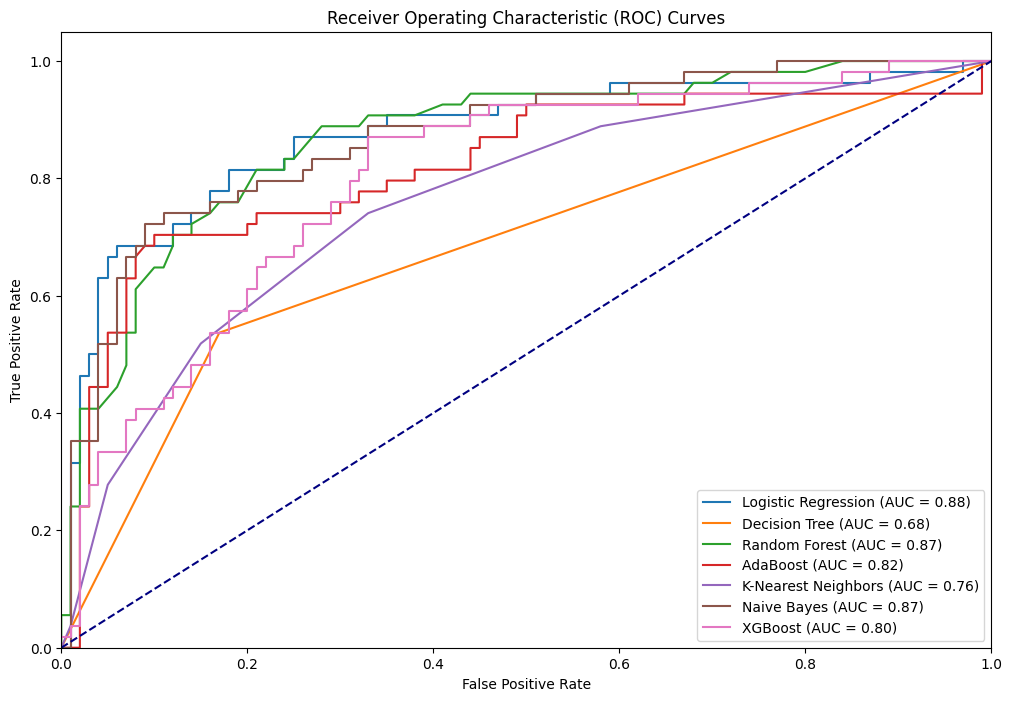

In [5809]:
from sklearn.metrics import roc_curve, auc

# Initialize an empty dictionary to store ROC data
roc_data = {}

for name, classifier in classifiers.items():
    # Check if the classifier supports probability estimates
    if hasattr(classifier, "predict_proba"):
        classifier.probability = True  # Enable probability estimates
    else:
        print(f"{name} does not support probability estimates and will not generate ROC curves.")
        continue

    classifier.fit(X_train, y_train)
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC data in the dictionary
    roc_data[name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }

# Create ROC plots for each classifier
plt.figure(figsize=(12, 8))
for name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

ENSEMBLE MODEL

In [5810]:
print(best_classifiers.keys())

dict_keys(['Logistic Regression', 'Random Forest', 'AdaBoost', 'SVM', 'Naive Bayes'])


In [5811]:
for i in range(y_pred_ensemble.size):
    if y_pred_ensemble[i] >= (len(best_classifiers)+1)/2:
        y_pred_ensemble[i] = 1
    else:
        y_pred_ensemble[i] = 0

In [5812]:
accuracy_score_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(accuracy_score_ensemble)

0.8571428571428571


In [5813]:
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble)
print(classification_rep_ensemble)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       100
           1       0.88      0.69      0.77        54

    accuracy                           0.86       154
   macro avg       0.86      0.82      0.83       154
weighted avg       0.86      0.86      0.85       154



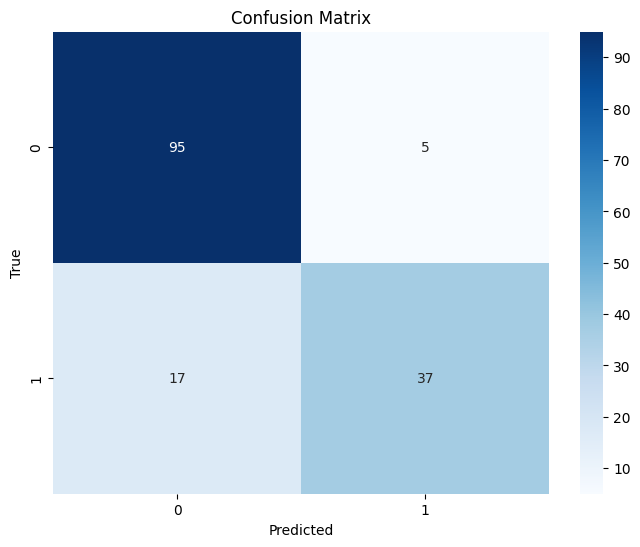

In [5814]:
cm = confusion_matrix(y_test, y_pred_ensemble)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

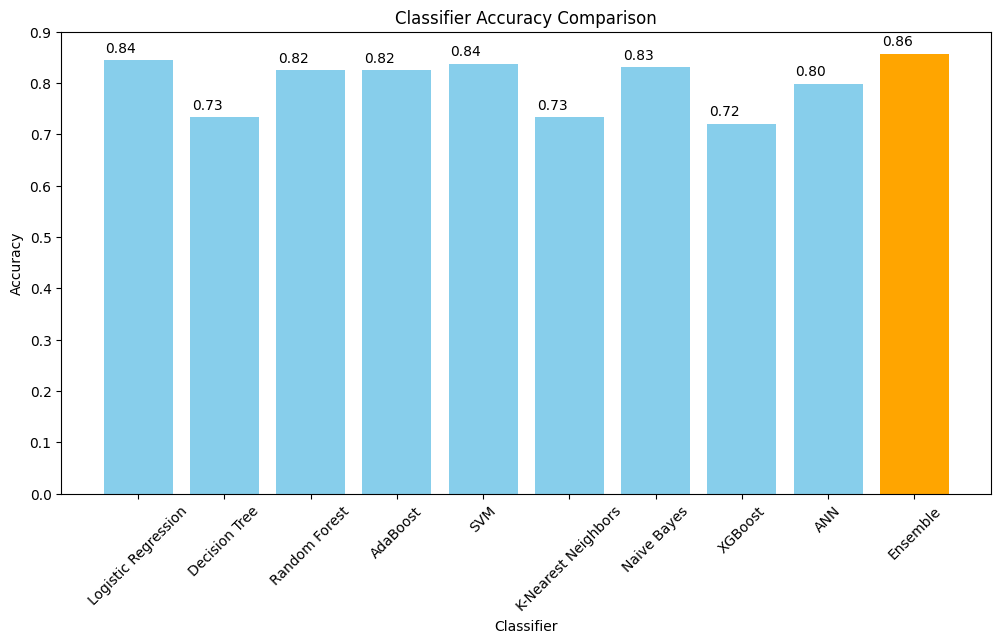

In [5815]:
accuracy_scores = [results[classifier]["Accuracy"] for classifier in classifiers.keys()]
classifier_names = list(classifiers.keys())

accuracy_scores.append(accuracy_score_ensemble)
classifier_names.append("Ensemble")

# Specify a different color for the Ensemble classifier
colors = ['skyblue'] * len(classifier_names)
colors[-1] = 'orange'  # Change the color of the Ensemble classifier to orange

# Plot the bar chart with specified colors
plt.figure(figsize=(12, 6))
bars = plt.bar(classifier_names, accuracy_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)

# Add labels to the bars
for bar, label in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, f'{label:.2f}', ha='center', va='bottom')

plt.show()

PREDICTION

In [5816]:
from collections import Counter

# # Input data for prediction
# user_input_data = []

# # Prompt the user to enter values for each feature
# for feature_name in X.columns:
#     value = float(input(f"Enter the value for {feature_name}: "))
#     user_input_data.append(value)

user_input_data = [6,148,72,35,0,33.6,0.627,50] # sample input data

# Standardize the user input data using the same scaler
input_data = scaler.transform([user_input_data])

# Make predictions using each classifier on the input data
all_predictions = [predict(name, classifier, input_data) for name,classifier in best_classifiers.items()]

# Count the most common prediction among the models for the input data
predictions_for_input = [pred[0] for pred in all_predictions]
most_common_prediction = Counter(predictions_for_input).most_common(1)[0][0]

if most_common_prediction == 0:
    print("Non-Diabetic person")
else:
    print("Diabetic Person")

Diabetic Person


c:\Users\abhik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
